This is a notebook for the Week 4 of the Developer Challenge: https://blogs.sap.com/2023/03/08/sap-community-developer-challenge-eda-with-sap-hana-and-python/

Some code might be incomplete or incorrect. It is your task to fix it and execute the whole notebook receiving correct results.

Submit the link to your solution: https://groups.community.sap.com/t5/application-development/submissions-for-quot-eda-with-sap-hana-quot-developer-challenge/m-p/227591/highlight/true#M1208

## Initialize the notebook

Import required packages

In [2]:
from hana_ml import dataframe as hdf
import pandas as pd

Connect to SAP HANA database instance with a database user, same as during Week 2!

In [3]:
myconn=hdf.ConnectionContext(userkey='DevChallenger')
print("SAP HANA DB version: ", myconn.hana_version())

SAP HANA DB version:  4.00.000.00.1678185420 (fa/CE2022.42)


In [4]:
print(myconn.sql("SELECT NOW() FROM DUMMY").collect().CURRENT_TIMESTAMP[0])

2023-03-29 10:28:44.310000


## Check tables from Week 2 are available for this week's exercises

You should see these 3 tables listed: `BIKES`, `MONTHS`, `SEASONS`. If not, then please complete the Week 2 first.

In [5]:
myconn.get_tables()

,TABLE_NAME
0,BIKES
1,SEASONS
2,MONTHS


Two weeks before this one you created HANA DataFrame `bikes_hdf` at the moment of loading a CSV file. As the table with data already existed in your database, a week ago you used [the `table()` method](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.dataframe.html#hana_ml.dataframe.ConnectionContext.table) to create the HANA DataFrame as-is.

This week use once again a select() method to add a calculated column `CalDay`, but as well to rename and rearange all other columns to make them easier to read and interpret.

In [6]:
bikes_hdf=myconn.table('BIKES').select(('"days_since_2011"', "Days_Counter"),
                                        ('add_days(\'2011-01-01\',"days_since_2011")', "CalDay"),
                                        ('"yr"', "Year"),
                                        ('"season"', "Season"),
                                        ('"mnth"', "Month"),
                                        ('"weekday"', "Weekday"),
                                        ('"workingday"', "Is_WorkingDay"),
                                        ('"holiday"', "Is_Holiday"),
                                        ('"weathersit"', "Weather"),
                                        ('"temp"', "Temperature"),
                                        ('"hum"', "Humidity"),
                                        ('"windspeed"', "Wind_Speed"),
                                        ('"cnt"', "Bikes_Rented")
                                       )

In [7]:
bikes_hdf.select_statement

'SELECT "days_since_2011" AS "Days_Counter", add_days(\'2011-01-01\',"days_since_2011") AS "CalDay", "yr" AS "Year", "season" AS "Season", "mnth" AS "Month", "weekday" AS "Weekday", "workingday" AS "Is_WorkingDay", "holiday" AS "Is_Holiday", "weathersit" AS "Weather", "temp" AS "Temperature", "hum" AS "Humidity", "windspeed" AS "Wind_Speed", "cnt" AS "Bikes_Rented" FROM (SELECT * FROM "BIKES") AS "DT_4"'

In [8]:
bikes_hdf.select_statement

'SELECT "days_since_2011" AS "Days_Counter", add_days(\'2011-01-01\',"days_since_2011") AS "CalDay", "yr" AS "Year", "season" AS "Season", "mnth" AS "Month", "weekday" AS "Weekday", "workingday" AS "Is_WorkingDay", "holiday" AS "Is_Holiday", "weathersit" AS "Weather", "temp" AS "Temperature", "hum" AS "Humidity", "windspeed" AS "Wind_Speed", "cnt" AS "Bikes_Rented" FROM (SELECT * FROM "BIKES") AS "DT_4"'

In [9]:
bikes_hdf.head(5).collect().set_index('Days_Counter')

,CalDay,Year,Season,Month,Weekday,Is_WorkingDay,Is_Holiday,Weather,Temperature,Humidity,Wind_Speed,Bikes_Rented
Days_Counter,,,,,,,,,,,,
0,2011-01-01,2011,WINTER,JAN,SAT,NO WORKING DAY,NO HOLIDAY,MISTY,8.175849,80.5833,10.749882,985
1,2011-01-02,2011,WINTER,JAN,SUN,NO WORKING DAY,NO HOLIDAY,MISTY,9.083466,69.6087,16.652113,801
2,2011-01-03,2011,WINTER,JAN,MON,WORKING DAY,NO HOLIDAY,GOOD,1.229108,43.7273,16.636703,1349
3,2011-01-04,2011,WINTER,JAN,TUE,WORKING DAY,NO HOLIDAY,GOOD,1.400000,59.0435,10.739832,1562
4,2011-01-05,2011,WINTER,JAN,WED,WORKING DAY,NO HOLIDAY,GOOD,2.666979,43.6957,12.522300,1600


In [10]:
bikes_hdf.count()

731

### Understand cells output

The [default output behavior](https://ipython.readthedocs.io/en/stable/config/options/terminal.html#configtrait-InteractiveShell.ast_node_interactivity) for a cell in Jupyter (with IPython kernel) is showing the evaluation result for the last expression.

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity.default_value

'last_expr'

That's why results are displayed by default by a cell containing `bikes_hdf.count()` or `bikes_hdf.head(5).collect().set_index('Days_Counter')` without calling `display()`, like
```
display(bikes_hdf.head(5).collect().set_index('Days_Counter'))
```

# 1. Data Visulaization using Pandas Plots

As Pandas dataframes store results of HANA DataFrame's `collect()` calls, data from these results can be visulazied using Pandas' [built-in support for data visualization through charts with matplotlib](https://pandas.pydata.org/docs/ecosystem.html#ecosystem-visualization).

In [12]:
from matplotlib import pyplot as plt

In [13]:
%matplotlib inline

As stayed at [the `matplotlib-inline` project's page](https://github.com/ipython/matplotlib-inline#usage):

> _Note that in current versions of JupyterLab and Jupyter Notebook, the explicit use of the `%matplotlib inline` directive is not needed anymore, though other third-party clients may still require it._

If you are using JupyterLab, then `plt.show()` might not be necessarily at the end of each cell as it is called by default in that client as described in https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html#matplotlib-pyplot-show (or can be seen executing `plt.show?` in a cell):

> **Auto-show in jupyter notebooks**
>
> _The jupyter backends (activated via `%matplotlib inline`, `%matplotlib notebook`, or `%matplotlib widget`), call `show()` at the end of every cell by default. Thus, you usually don't have to call it explicitly there._

But to be consistent with other clients you might use, `plt.show()` is included.

In [14]:
plt.show()

## Foundations of plotting with Matplotlib

The basic `plot()` method's call plots line charts for all numeric columns into a single axes on a single figure.

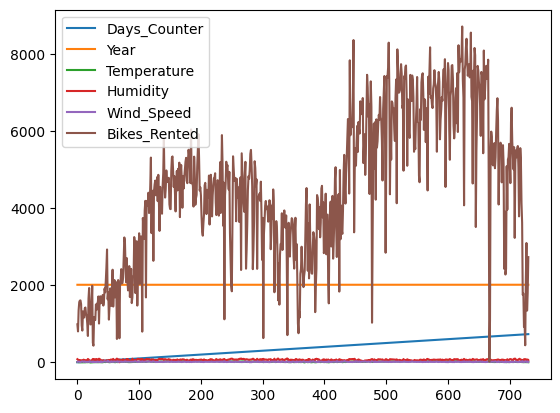

In [15]:
bikes_hdf.collect().plot()
plt.show()

There is a lot on this figure, but little to understand on the first sight. 

Let's unpack it to understnd and to improve in notebook's cells below.
1. Horizontal axes X has a scale equal to the number of records in a dataframe used, in this case should be equal to `bikes_hdf.count()` or 731
2. Vertical axes Y has a scale to accomodate all values from all numeric columns, in this case `Bikes_Rented` has values between 0 and more than 8000. It makes lines ploted for other columns, like `Humidity` with the scale between 0 and 100 pretty much unreadable.
3. Each column's values are ploted using a separate color. These colors are not random, but are coming from a default color cycler stored in [Runtime Configuration Parametes `rcParams`](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#default-values-and-styling) with a key `'axes.prop_cycle'`.

#### Understand default color cycler

Below cells with code will print codes and display corresponding colors from the default color cycler as a pie plot.

In [16]:
prop_cycle_default = plt.rcParams['axes.prop_cycle']

In [17]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors_df = pd.Series(data=[1]*len(colors), index=colors)
display(colors_df)

#1f77b4    1
#ff7f0e    1
#2ca02c    1
#d62728    1
#9467bd    1
#8c564b    1
#e377c2    1
#7f7f7f    1
#bcbd22    1
#17becf    1
dtype: int64

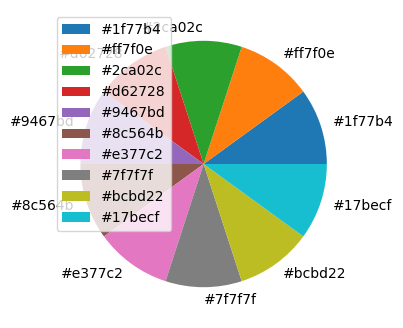

In [18]:
colors_df.plot(kind='pie', legend=True, figsize=(4,4))
plt.show()

The default order in Matplotlib's pie charts is counterclockwise starting from the 3 o'clock.

#### Change color cycler to follow SAP Fiori branding

Update default cycler to use secondary colors of Belize theme from SAP Fiori: https://experience.sap.com/fiori-design-web/colors/#accent-colors

In [19]:
from cycler import cycler 
sap_fiori_belize_cycler = cycler(color=['#0092D1', '#E09D00', '#1A9898', '#E6600D', '#925ACE', '#759421', '#678BC7', '#C14646', '#647987', '#AB218E'])

plt.rc('axes', prop_cycle=sap_fiori_belize_cycler)

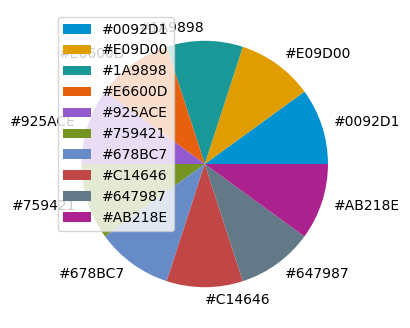

In [20]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
colors_df = pd.Series(data=[1]*len(colors), index=colors)

colors_df.plot(kind='pie', legend=True, figsize=(4,4))
plt.show()

## Plot something meaningful

This time:
1. Plot data for a number of rented bikes and a daily temperature. You should note that colors from the new color cycler are now used.
2. Set X scale to dates `x='CalDay'`.
3. Use a separate ("`secondary_y`") scale for a temperature.
4. Set bigger size for this figure: `figsize=(18, 6)`.

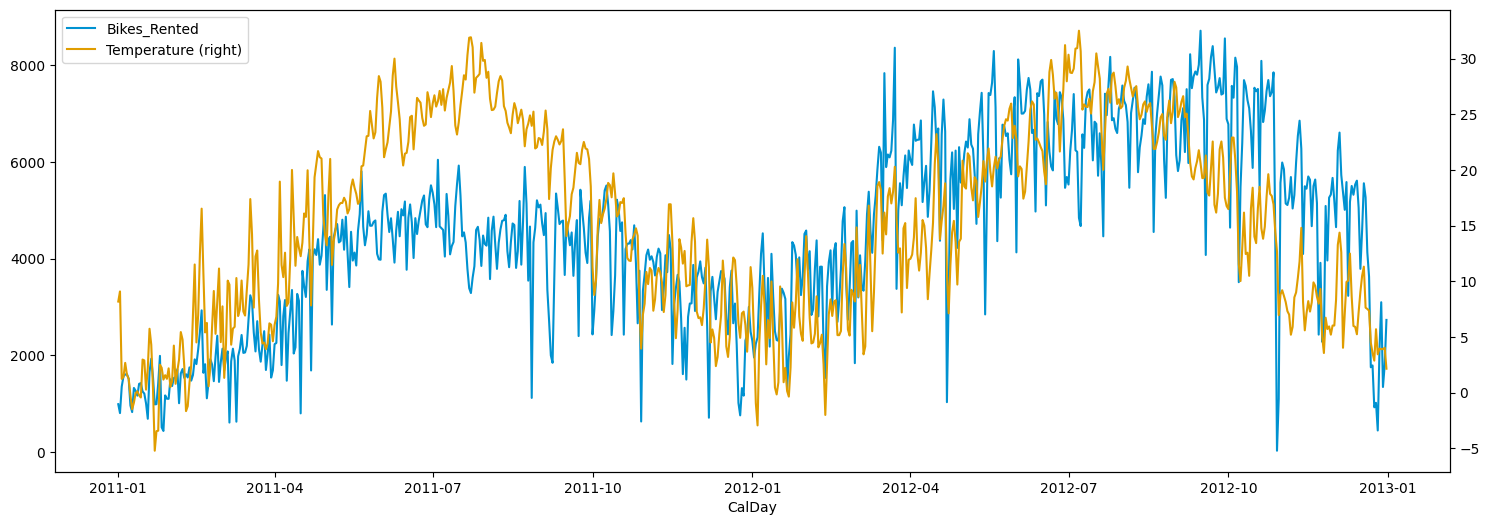

In [21]:
(bikes_hdf
 .select('CalDay', 'Bikes_Rented', 'Temperature').collect()
 .plot(x='CalDay', secondary_y=['Temperature'], figsize=(18, 6))
)
plt.show()

You should be able to see:
1. seasonal cycles: temperatures and rentals are higher during summer, and lower during winter, but...
2. as well rental is somewhat dropping when a temperature rises above 25 degrees Celcius
3. There were less bicycles rented during the first summer, but that might be caused by a lower supply, i.e. a number of bikes provided. 

Set this figure size -- 18x6 inches -- as a new default for new figures in this notebook.

In [22]:
figsize_default=plt.rcParams["figure.figsize"]
print("Previous default figure size was : ", figsize_default)
plt.rcParams["figure.figsize"] = (18, 6)
print("Current default figure size is   : ", plt.rcParams["figure.figsize"])

Previous default figure size was :  [6.4, 4.8]
Current default figure size is   :  [18.0, 6.0]


Now, let's plot humidity and wind speed, but using next colors from the current color cycler. 

A `"Cn"` color spec, i.e. `"C"` followed by a number, which is an index into the default property cycle starting from 0, as described in  https://matplotlib.org/stable/gallery/color/color_demo.html#color-demo.

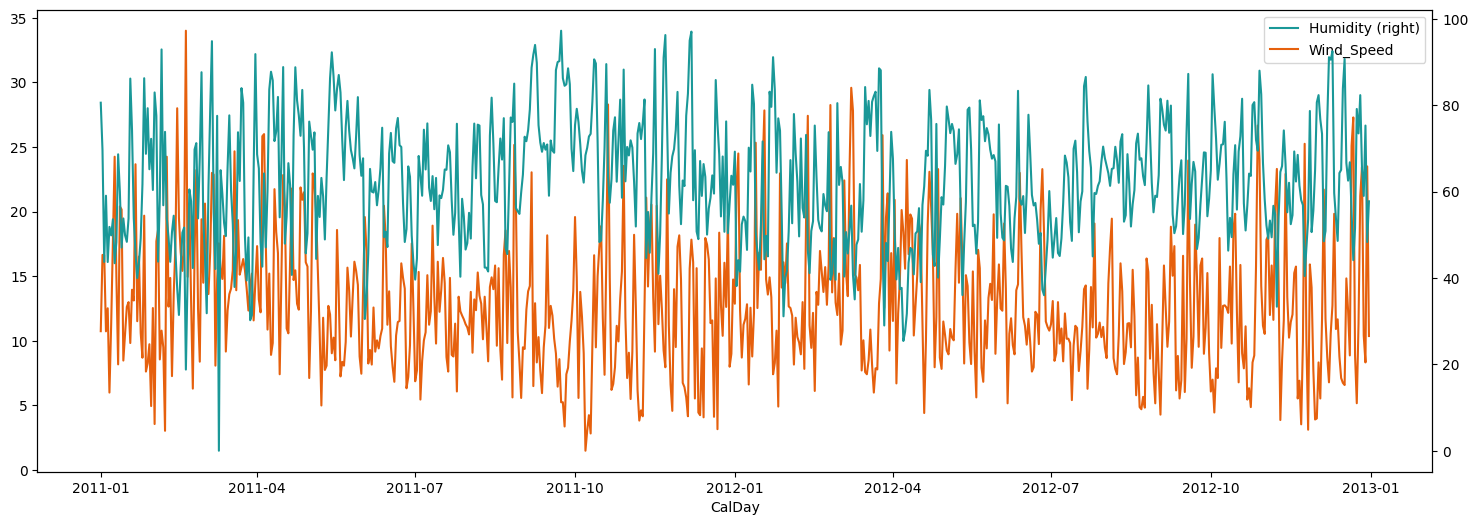

In [23]:
(bikes_hdf
 .select('CalDay', 'Humidity', 'Wind_Speed').collect()
 .plot(x='CalDay', secondary_y=['Humidity'], color=('C2','C3'))
)
plt.show()

## Scaterplots

Check correlation between a temperature and a number of bikes rented using a `plot.scatter` Pandas dataframe method.

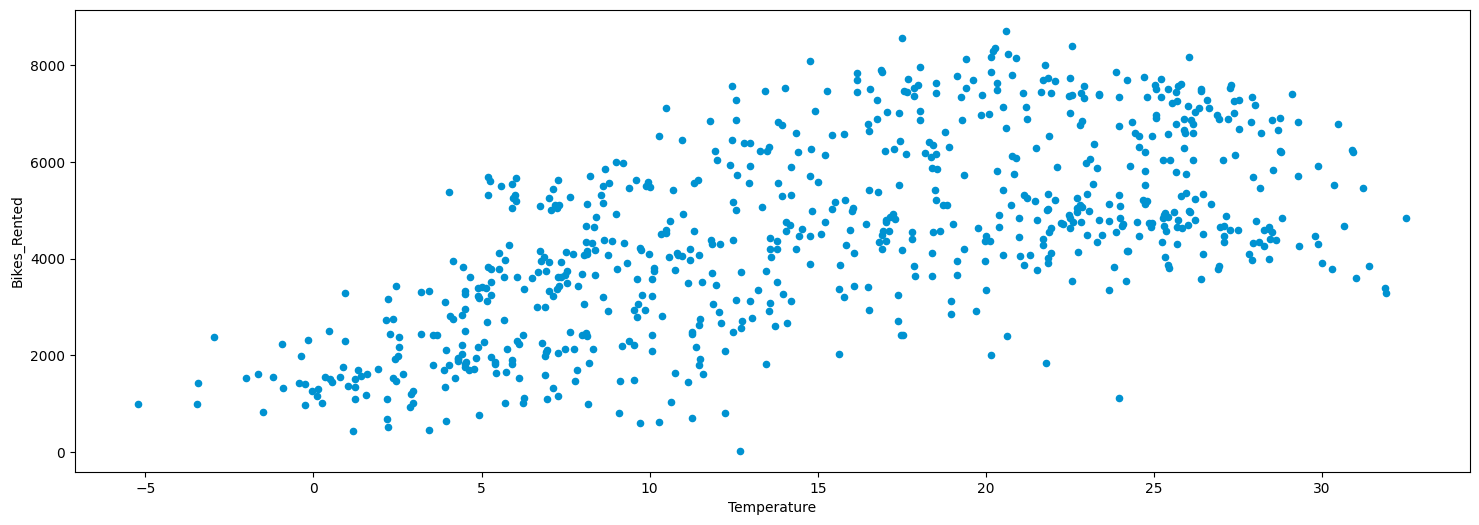

In [24]:
(bikes_hdf
 .select('Bikes_Rented', 'Humidity', 'Temperature').collect()
 .plot.scatter(y='Bikes_Rented', x='Temperature')
)
plt.show()

You might notice a tendency that a number of rented bikes is growing with the temperature up to about +25C, but then it is becoming too hot and a number of bikes is dropping.

Add color coding for humidity.

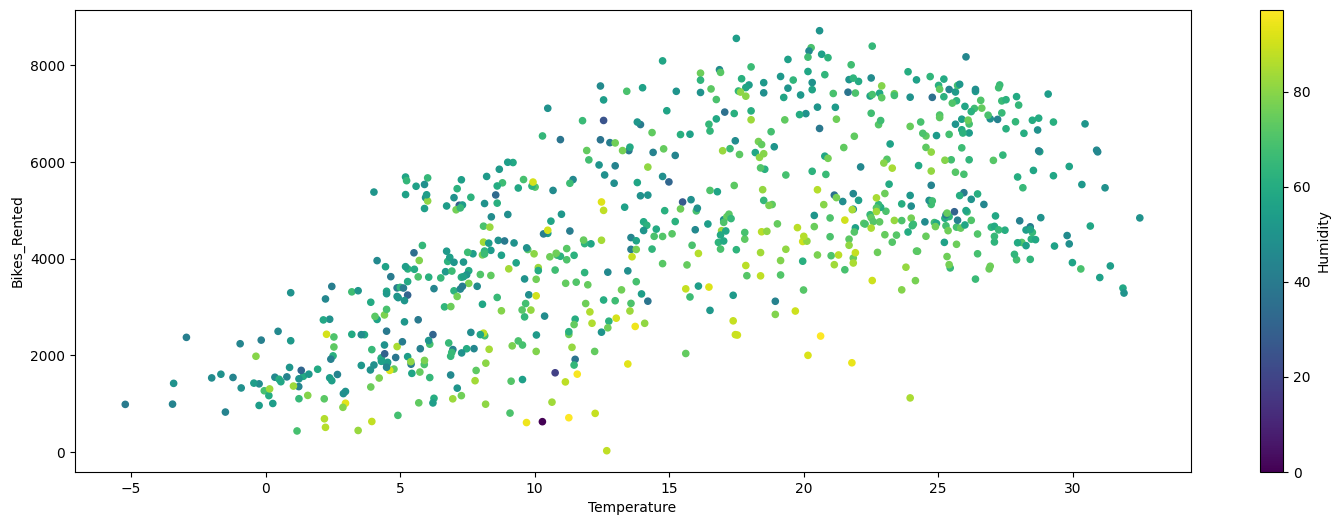

In [25]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Humidity').collect()
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Humidity')
)
plt.show()

You might notice that:
1. Colors for different values of the same column are not following the same color cycle as it was for different columns on charts above. Now a clorbar on the chart uses a colormap, by default it is `viridis`.
2. For the same temperature measures numbers of bikes rented have a tendency to be on a lower side for the highe humidity.

Now Matplotlib allows to use non-numberic columns for collor-coding, but they must be converted to Pandas category type.

Replace color coding to be based on a `Season` column. To avoid default monochrome colormap used for categorical data, explicitely specify a colormap to be `viridis`.

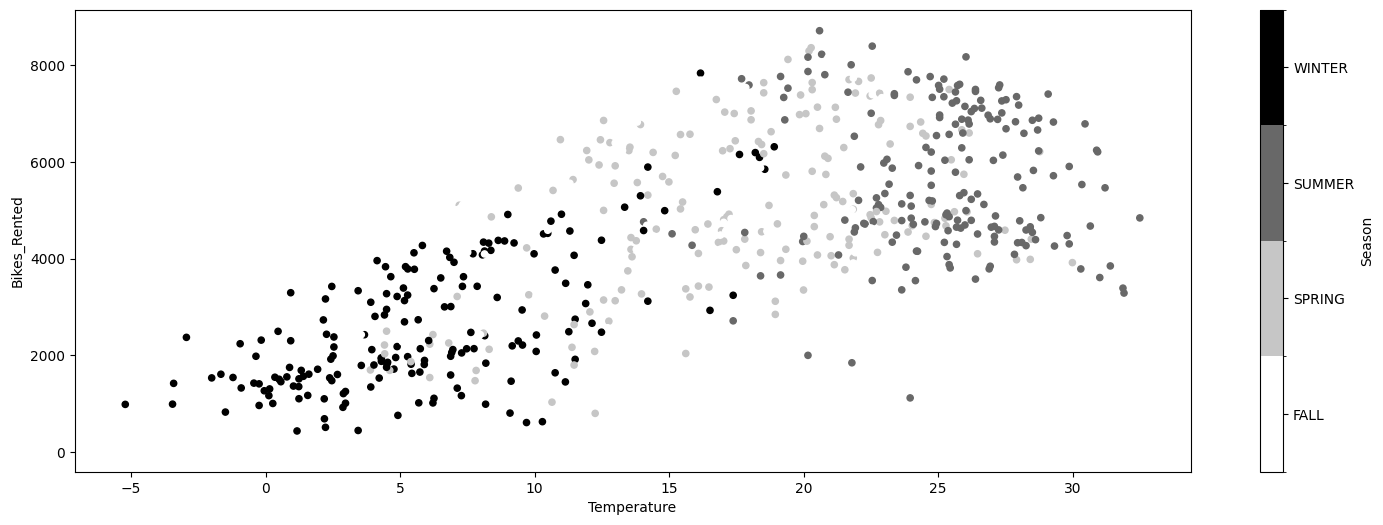

In [26]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Season').collect().astype({"Season": 'category'})
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Season', 
               #colormap='viridis' #try to comment this like to see the difference
              )
)
plt.show()

Now do he same for a `Year` column.

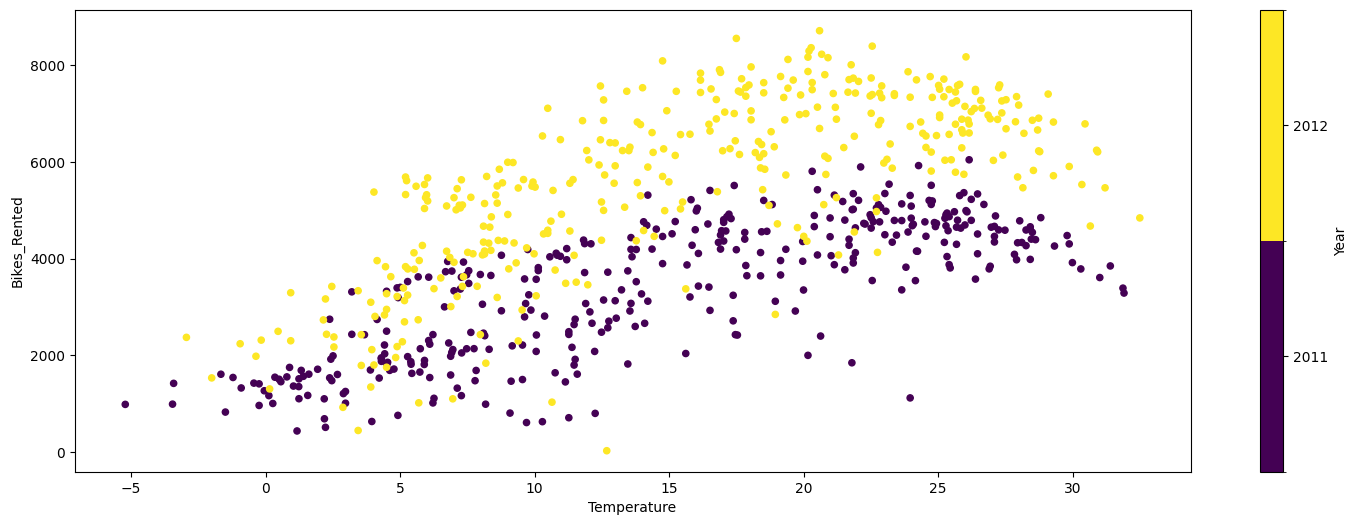

In [27]:
(bikes_hdf
 .select('Bikes_Rented', 'Temperature', 'Year').collect().astype({"Year": 'category'})
 .plot.scatter(y='Bikes_Rented', x='Temperature', c='Year', colormap='viridis')
)
plt.show()

## Plot categorical data

When analysing categorical (not numerical columns) we usually analyse their values occurence in the dataset.

Visualize how often each weather situation happened in the HANA DataFrame.

In [28]:
weather_df=bikes_hdf.value_counts(['Weather']).collect().set_index('VALUES')
display(weather_df)

,NUM_Weather
VALUES,
MISTY,247
GOOD,463
RAIN/SNOW/STORM,21


Data scientists love to hate pie charts, so let's use it first.

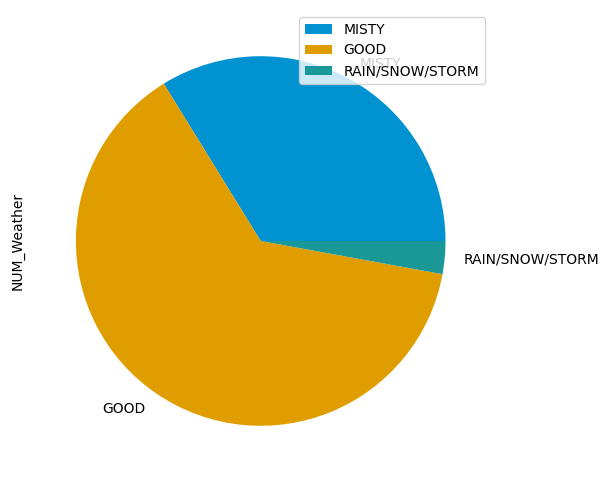

In [29]:
(weather_df
 .plot.pie(y = 'NUM_Weather')
)
plt.show()

There are a few good practices when using pie charts:
1. Segments should be sorted from the biggest to the smallest.
2. Percentage values should be displayed to avoid guessing them by comparing angles of segments.
3. A human eye usually starts from 12 o'clock and then goes clock-wise.
4. Avoid unnecessary information, like having an additional legend on a figure.

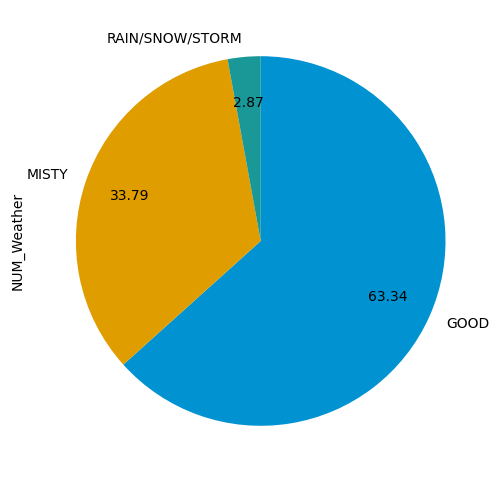

In [30]:
(weather_df
 .sort_values('NUM_Weather', ascending=False)
 .plot.pie(y = 'NUM_Weather', legend=False, 
        startangle=90, counterclock=False,
        autopct='%.2f', pctdistance=0.75)
)
plt.show()

As mentioned, data scientists love to have pie charts, and many says bar charts should be used instead.

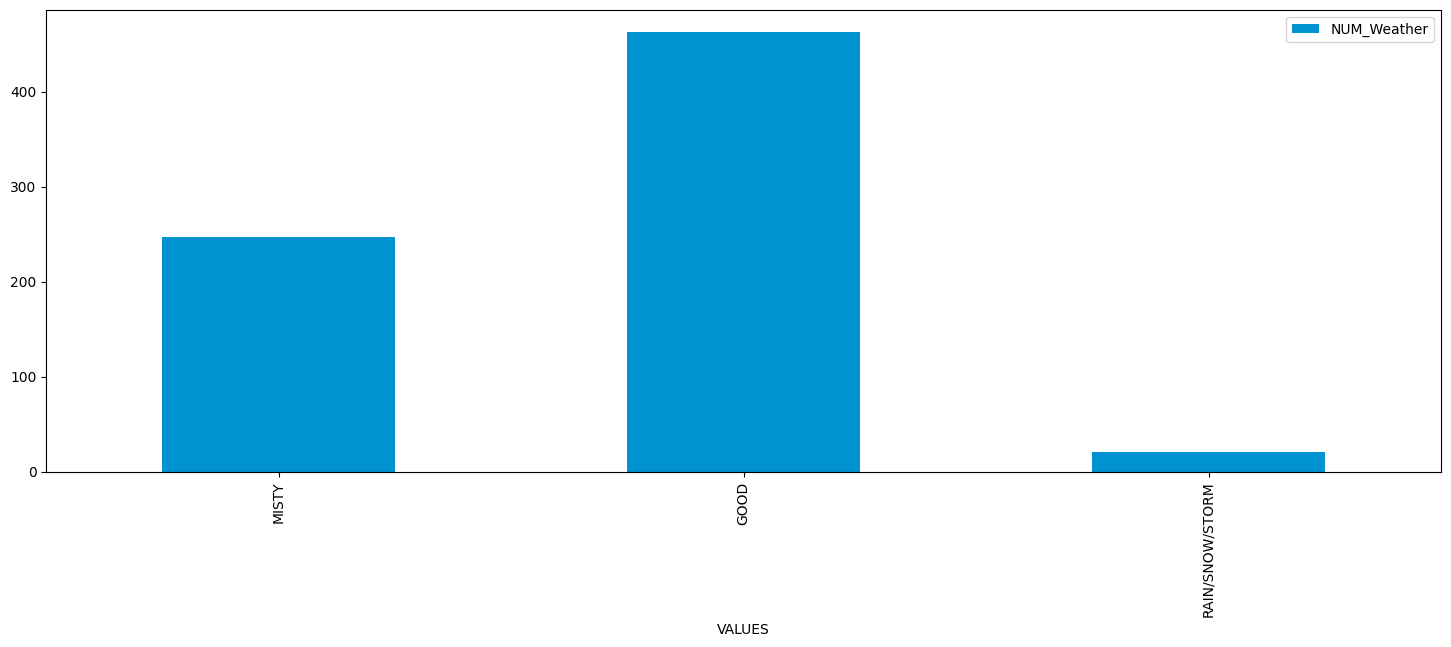

In [31]:
weather_df.plot.bar()
plt.show()

Some good practices apply to bar/column charts as well:
1. Column charts should be used when category is related to the time, otherwise horizontal bar charts should be used.
2. Bars should be sorted either accordingly to their values or alphabetically by their names.
3. Value labels should be displayed to avoid guessing them from the scale.

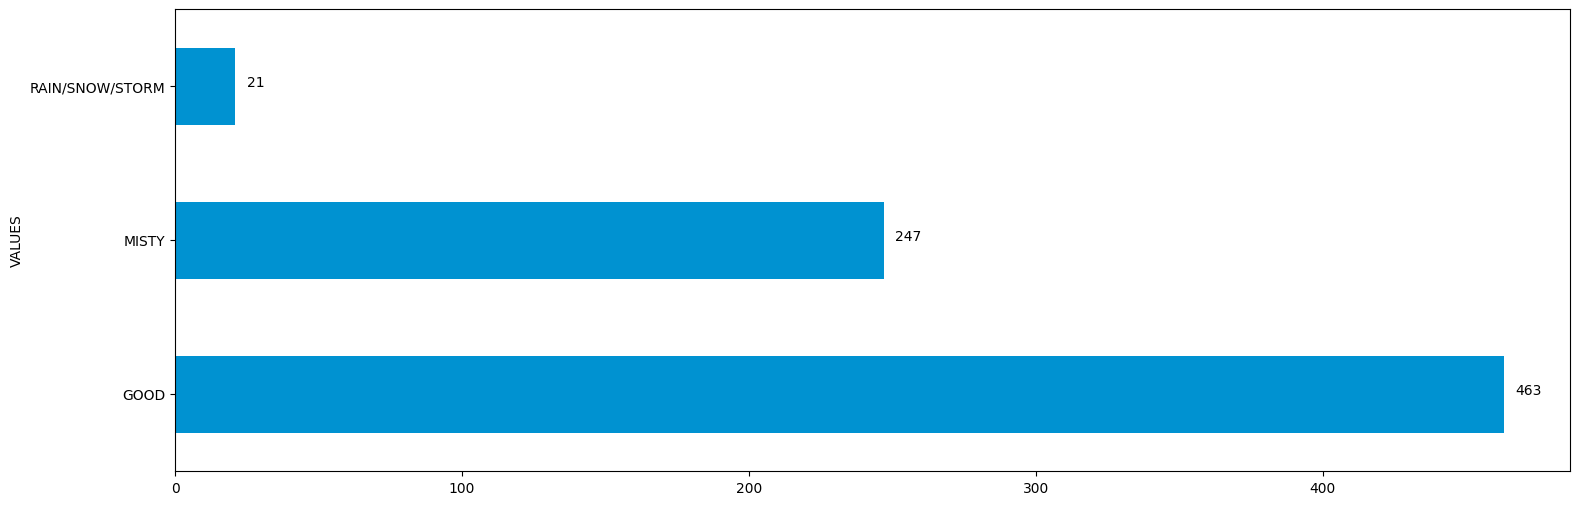

In [32]:
(weather_df
 .sort_values('NUM_Weather', ascending=False)
 .plot.barh(legend=False)
)

#Using text annotations to calculate positions and place values next to their corresponding bars
for i in range(len(weather_df)):
    plt.text(y = i, 
             x = weather_df.sort_values('NUM_Weather', ascending=False).NUM_Weather[i]+4, # x position
             s = weather_df.sort_values('NUM_Weather', ascending=False).NUM_Weather[i],   # text to display
             ha = 'left')
plt.show()

# 2. Data Visulaization using `hana-ml` EDA

So far you created plots once data has been stored in a Pandas dataframe after being selected from a HANA DataFrame.

Python Machine Learning Client for SAP HANA provides [the `hana_ml.visualizers` package](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.visualizers.html#hana-ml-visualizers-package) with many specialized statistics visualizations that push down calculations to SAP HANA database and then visualize results in a client using either Matplotlib (default) or Plotly.

Most of capabilities from that package are not available in a trial environment (as of March 2023), so let's look at just a few capabilities that are available.

In [33]:
from hana_ml.visualizers.eda import EDAVisualizer

[EDAVisualizer](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.visualizers.html#hana_ml.visualizers.eda.EDAVisualizer) is `hana-ml`'s class for all EDA visualizations, including for example [pie plot](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.visualizers.html#hana_ml.visualizers.eda.EDAVisualizer.pie_plot) or [bar plot](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2022_4_QRC/en-US/hana_ml.visualizers.html#hana_ml.visualizers.eda.EDAVisualizer.bar_plot).

For most of the plotting methods it returns Pandas dataframe with the data used in the plot.

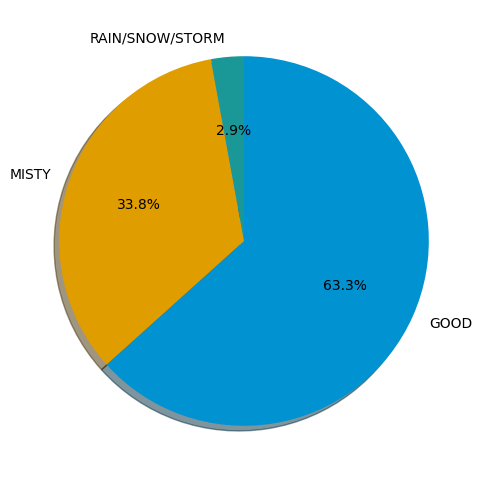

In [34]:
_, df = EDAVisualizer().pie_plot(data=bikes_hdf, column='Weather',
                                 legend=False, explode=0, 
                                 startangle=90, counterclock=False)
plt.show()

In [35]:
display(df)

,Weather,COUNT
0,GOOD,463
1,MISTY,247
2,RAIN/SNOW/STORM,21


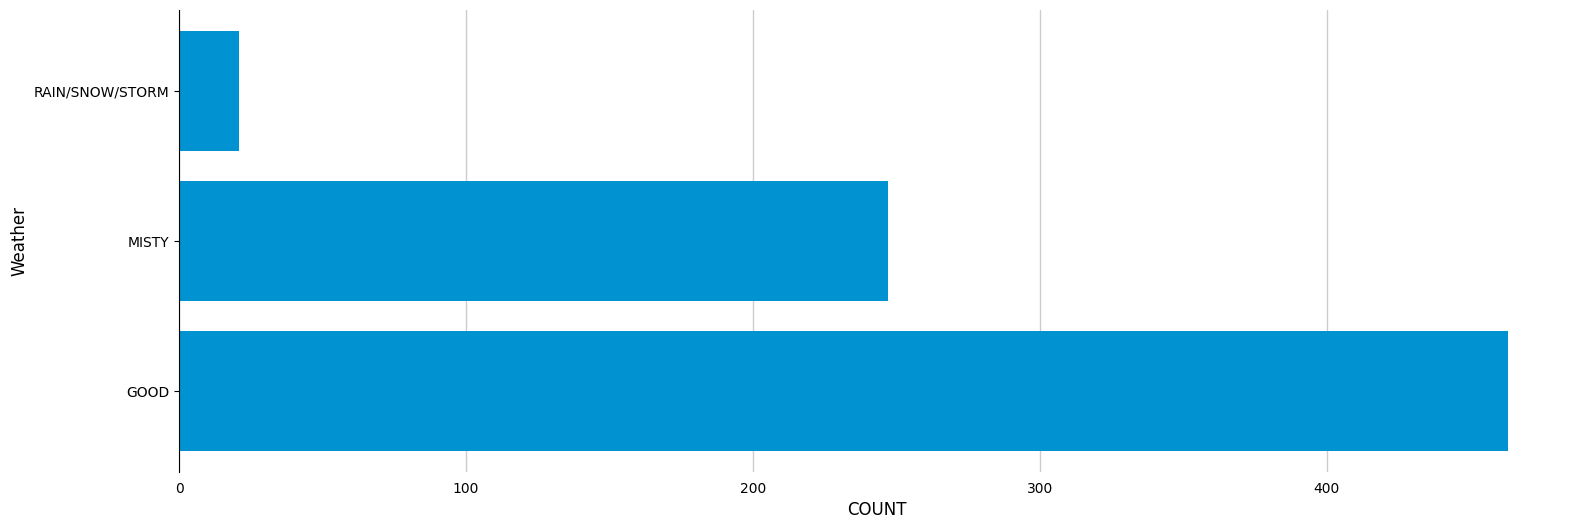

In [36]:
_, df = EDAVisualizer().bar_plot(data=bikes_hdf, column='Weather', aggregation={'Weather':'count'})
plt.show()

In [37]:
display(df)

,Weather,COUNT
0,GOOD,463
1,MISTY,247
2,RAIN/SNOW/STORM,21


# And that's it for now!

Thank you for joining the challenge, we hope you learned something new.

Please share your feedback and thoughts what else you would like to try in the comments to the https://blogs.sap.com/2023/03/08/sap-community-developer-challenge-eda-with-sap-hana-and-python/